In [30]:
import pandas as pd
from glob import glob
from category_encoders import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, interact, interact_manual, IntSlider, Widget
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
import plotly.express as px
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted


In [31]:

# URL of the  CSV file
# Load CSV file from the same directory
csv_files = glob("Nairobi_Transport_Data*.csv")
if csv_files:
    df = pd.read_csv(csv_files[0])
    print(f"Loaded {csv_files[0]}")
else:
    print("No CSV files found in the directory.")

Loaded Nairobi_Transport_Data.csv


In [32]:
# The dataframe 'df' is already loaded in CELL INDEX: 2
df.head()

,distance,cab_type,time_stamp,destination,source,price,humidity,rain,clouds,temp,wind
0,0.44,Nissan,1544952607890,Kileleshwa,Nairobi CBD,5.0,0.77,0.1228,1.0,42.42,11.25
1,0.44,Nissan,1543284023677,Kileleshwa,Nairobi CBD,11.0,0.76,0.1846,1.0,42.43,11.32
2,0.44,Nissan,1543366822198,Kileleshwa,Nairobi CBD,7.0,0.76,0.1089,1.0,42.50,11.07
3,0.44,Nissan,1543553582749,Kileleshwa,Nairobi CBD,26.0,0.77,0.0969,1.0,42.11,11.09
4,0.44,Nissan,1543463360223,Kileleshwa,Nairobi CBD,9.0,0.75,0.1786,1.0,43.13,11.49


In [33]:
# Impute missing values 
imputer = SimpleImputer(strategy='mean')
df['wind'] = imputer.fit_transform(df[['wind']])

# Display the dataframe to verify imputation
df.head()

,distance,cab_type,time_stamp,destination,source,price,humidity,rain,clouds,temp,wind
0,0.44,Nissan,1544952607890,Kileleshwa,Nairobi CBD,5.0,0.77,0.1228,1.0,42.42,11.25
1,0.44,Nissan,1543284023677,Kileleshwa,Nairobi CBD,11.0,0.76,0.1846,1.0,42.43,11.32
2,0.44,Nissan,1543366822198,Kileleshwa,Nairobi CBD,7.0,0.76,0.1089,1.0,42.50,11.07
3,0.44,Nissan,1543553582749,Kileleshwa,Nairobi CBD,26.0,0.77,0.0969,1.0,42.11,11.09
4,0.44,Nissan,1543463360223,Kileleshwa,Nairobi CBD,9.0,0.75,0.1786,1.0,43.13,11.49


In [34]:
df.describe()

,distance,time_stamp,price,humidity,rain,clouds,temp,wind
count,693071.000000,6.930710e+05,637976.000000,6276.000000,894.000000,6276.000000,6276.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,0.763985,0.057652,0.677777,39.090475,6.802812
std,1.138937,6.891925e+08,9.324359,0.127340,0.100758,0.314284,6.022055,0.345732
min,0.020000,1.543204e+12,2.500000,0.450000,0.000200,0.000000,19.620000,0.290000
25%,1.280000,1.543444e+12,9.000000,0.670000,0.004900,0.440000,36.077500,6.802812
50%,2.160000,1.543737e+12,13.500000,0.760000,0.014850,0.780000,40.130000,6.802812
75%,2.920000,1.544828e+12,22.500000,0.890000,0.060925,0.970000,42.832500,6.802812
max,7.860000,1.545161e+12,97.500000,0.990000,0.780700,1.000000,55.410000,18.180000


In [35]:
df.drop(columns={"source","time_stamp"}, inplace=True)
df.head()


,distance,cab_type,destination,price,humidity,rain,clouds,temp,wind
0,0.44,Nissan,Kileleshwa,5.0,0.77,0.1228,1.0,42.42,11.25
1,0.44,Nissan,Kileleshwa,11.0,0.76,0.1846,1.0,42.43,11.32
2,0.44,Nissan,Kileleshwa,7.0,0.76,0.1089,1.0,42.50,11.07
3,0.44,Nissan,Kileleshwa,26.0,0.77,0.0969,1.0,42.11,11.09
4,0.44,Nissan,Kileleshwa,9.0,0.75,0.1786,1.0,43.13,11.49


In [ ]:
#pair plot
px.scatter_matrix(df, dimensions=['distance', 'temp', 'rain', 'clouds', 'wind'], color='price', title='Pair Plot of the Data')



In [9]:
# Assuming the column name is 'price_in_dollars'
df['price_ksh'] = df['price'] * 129
df.drop(columns='price', inplace=True)
# Display the dataframe to verify the conversion
df.head()

,distance,cab_type,destination,humidity,rain,clouds,temp,wind,price_ksh
0,0.44,Nissan,Kileleshwa,0.77,0.1228,1.0,42.42,11.25,645.0
1,0.44,Nissan,Kileleshwa,0.76,0.1846,1.0,42.43,11.32,1419.0
2,0.44,Nissan,Kileleshwa,0.76,0.1089,1.0,42.50,11.07,903.0
3,0.44,Nissan,Kileleshwa,0.77,0.0969,1.0,42.11,11.09,3354.0
4,0.44,Nissan,Kileleshwa,0.75,0.1786,1.0,43.13,11.49,1161.0


In [8]:
df.describe()



,distance,humidity,rain,clouds,temp,wind,price_ksh
count,693071.000000,6276.000000,894.000000,6276.000000,6276.000000,693071.000000,637976.000000
mean,2.189430,0.763985,0.057652,0.677777,39.090475,6.802812,2134.321188
std,1.138937,0.127340,0.100758,0.314284,6.022055,0.345732,1202.842257
min,0.020000,0.450000,0.000200,0.000000,19.620000,0.290000,322.500000
25%,1.280000,0.670000,0.004900,0.440000,36.077500,6.802812,1161.000000
50%,2.160000,0.760000,0.014850,0.780000,40.130000,6.802812,1741.500000
75%,2.920000,0.890000,0.060925,0.970000,42.832500,6.802812,2902.500000
max,7.860000,0.990000,0.780700,1.000000,55.410000,18.180000,12577.500000


In [10]:
# Reduce the values in the price column by 99.7%
df['price_reduced'] = df['price_ksh'] * 0.02

# View the updated dataframe
print(df[['price_ksh', 'price_reduced']].head())


   price_ksh  price_reduced
0      645.0          12.90
1     1419.0          28.38
2      903.0          18.06
3     3354.0          67.08
4     1161.0          23.22


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   distance       693071 non-null  float64
 1   cab_type       693071 non-null  object 
 2   destination    693071 non-null  object 
 3   humidity       6276 non-null    float64
 4   rain           894 non-null     float64
 5   clouds         6276 non-null    float64
 6   temp           6276 non-null    float64
 7   wind           693071 non-null  float64
 8   price_ksh      637976 non-null  float64
 9   price_reduced  637976 non-null  float64
dtypes: float64(8), object(2)
memory usage: 52.9+ MB


In [23]:
isnull = df.isnull().sum()
isnull[isnull > 0]

Series([], dtype: int64)

In [22]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')

# Use .loc[] to ensure the operation is done on the original dataframe
df['humidity'] = imputer.fit_transform(df[['humidity']])

# Display the dataframe to verify imputation
df.head()


,distance,cab_type,destination,humidity,rain,clouds,temp,wind,price_ksh,price_reduced
0,0.44,Nissan,Kileleshwa,0.77,0.1228,1.0,42.42,11.25,645.0,12.90
1,0.44,Nissan,Kileleshwa,0.76,0.1846,1.0,42.43,11.32,1419.0,28.38
2,0.44,Nissan,Kileleshwa,0.76,0.1089,1.0,42.50,11.07,903.0,18.06
3,0.44,Nissan,Kileleshwa,0.77,0.0969,1.0,42.11,11.09,3354.0,67.08
4,0.44,Nissan,Kileleshwa,0.75,0.1786,1.0,43.13,11.49,1161.0,23.22


In [24]:
df.drop(columns='price_ksh', inplace=True)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target variable
categorical_cols = ['cab_type', 'destination']  # Categorical features
numerical_cols = ['wind','rain', 'distance', 'humidity','temp','clouds']  # Numerical features
X_cat = df[categorical_cols]
X_num = df[numerical_cols]
y = df['price_reduced']

# Apply one-hot encoding to categorical variables
encoder = OneHotEncoder()
X_cat_encoded = encoder.fit_transform(X_cat)

# Impute missing values in numerical features
imputer = SimpleImputer(strategy='mean')
X_num_imputed = imputer.fit_transform(X_num)

# Concatenate numerical and encoded categorical features
X = np.hstack((X_num_imputed, X_cat_encoded))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 465.17295193819496
R-squared: 0.12577480061456758


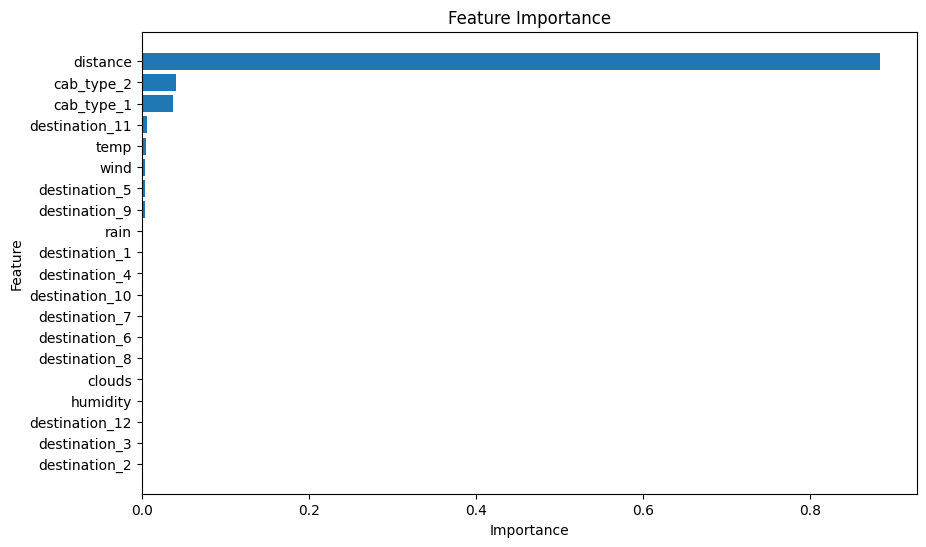

In [28]:
import matplotlib.pyplot as plt

# Get feature importances from the model
feature_importances = model.feature_importances_

# Combine numerical and categorical feature names
feature_names = numerical_cols + list(X_cat_encoded.columns)

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [ ]:

from ipywidgets import Dropdown, FloatSlider, interact_manual
import pandas as pd
import numpy as np

def predict_price(cab_type, destination, wind, rain, distance, humidity, temp, clouds):
    try:
        # Create a dataframe with the input values
        input_df = pd.DataFrame({
            'cab_type': [cab_type],
            'destination': [destination],
            'wind': [wind],
            'rain': [rain],
            'distance': [distance],
            'humidity': [humidity],
            'temp': [temp],
            'clouds': [clouds]
        })

        # Encode categorical features
        input_cat = encoder.transform(input_df[['cab_type', 'destination']])
        input_num = input_df[['wind', 'rain', 'distance', 'humidity', 'temp', 'clouds']]

        # Handle missing values for numerical features
        input_num_imputed = imputer.transform(input_num)

        # Combine encoded and numerical features
        input_final = np.hstack((input_num_imputed, input_cat))

        # Predict the price
        predicted_price = model.predict(input_final)

        return f"Predicted Price: Ksh {predicted_price[0]:.2f}"
    except Exception as e:
        return f"Error: {e}"


# Create widgets for each feature
cab_type_widget = Dropdown(options=df['cab_type'].unique(), description='Cab Type:')
destination_widget = Dropdown(options=df['destination'].unique(), description='Destination:')
wind_widget = FloatSlider(min=df['wind'].min(), max=df['wind'].max(), step=0.1, description='Wind:')
rain_widget = FloatSlider(min=df['rain'].min(), max=df['rain'].max(), step=0.1, description='Rain:')
distance_widget = FloatSlider(min=df['distance'].min(), max=df['distance'].max(), step=0.1, description='Distance:')
humidity_widget = FloatSlider(min=df['humidity'].min(), max=df['humidity'].max(), step=0.1, description='Humidity:')
temp_widget = FloatSlider(min=df['temp'].min(), max=df['temp'].max(), step=0.1, description='Temp:')
clouds_widget = FloatSlider(min=df['clouds'].min(), max=df['clouds'].max(), step=0.1, description='Clouds:')

# Create an interactive interface
interact_manual(
    predict_price,
    cab_type=cab_type_widget,
    destination=destination_widget,
    wind=wind_widget,
    rain=rain_widget,
    distance=distance_widget,
    humidity=humidity_widget,
    temp=temp_widget,
    clouds=clouds_widget
)


interactive(children=(Dropdown(description='Cab Type:', options=('Nissan', 'Supermetro'), value='Nissan'), Dro…

<function __main__.predict_price(cab_type, destination, wind, rain, distance, humidity, temp, clouds)>